# Predicting Credit Card Default

### Answer the question will you default on your credit card next month?

## Summary:

In this project, I will develop several machine learning models to predict the default of credit cards next month. I will first explore the data for insight, then use different modelling techniques to predict default.

#### Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

#### Features description:
* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no) : positive calss as default, negative class: pay

## Exploratory Questions

1. How does the default payment vary by categories of different demographic variables?
2. Which variables are the strongest predictors of default payment?
3. what makes someone more or less likely to default

## Schedule
* Load the data set
* Data preparation
* Build Models
* Model Evaluation
* Make prediction

## Import libraries and packages
Now, we need to import the necessary libraries and packages for the project.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To surpress all future warnings
import warnings
warnings.filterwarnings('ignore')

# View the data

Now, let's read in the files and view the data to have a better understanding of the data sets.

In [2]:
credit_data = pd.read_excel('data/default of credit card clients.xls', header = 1)
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# checking total columns available in our data set
credit_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

These are the columns in our data set. We will further investigate the different categorical columns in later sessions.

In [4]:
# check the data shape
credit_data.shape
print( f'The Data shape is : {credit_data.shape}')

The Data shape is : (30000, 25)


In [5]:
# check data info
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
# check for null
credit_data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

We don't have any null values. now let's focus on exploring the statistics

In [7]:
# get basic statistics on the data
credit_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Looking at the statisctic summary table , the average value for the amount of credit card limit is 167,484 NT dollars. The standard deviation is 129,747 NT dollars, ranging from 10,000 to 1M NT dollars.
Education level is mostly graduate school (1) and university (2). Most of the clients are either married or single (less frequent than the other status). The average age is 35.5 years, with a standard deviation of 9.2 years

The data is already encoded and clean. However, some categorical data have some repeated values. For instance, the variable ‘education’ has three categories with similar information:
4: others, 5: unknown, and 6: unknown

In [8]:
# Checking unique values for education column
credit_data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [9]:
# Checking unique values for marriage column
credit_data['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [10]:
# Simplify the columns 
credit_data['MARRIAGE'].replace(0, 3, inplace = True)
credit_data['EDUCATION'].replace([0, 5, 6], 4, inplace = True)
credit_data.drop(['ID'], axis = 1, inplace = True)
credit_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


The above simplifies education and marriage columns. Education becomes 1:graduate school; 2: University; 3: for high school and 4: for others.
Marriage simplifies to 1:married; 2:single and 3 for others and we also drop the ID column which is not relevant for analysis in this project.

In [11]:
# verify simplified column
credit_data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [12]:
# verify if we simplified the column
credit_data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Now let's check the default column

In [13]:
# check total number of people who paid the default
credit_data['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

This shows an imbalanced data that we can further confirm with a countplot in the exploratory data analysis

We can also simplify the target name to default instead of default payment next month.

In [14]:
credit_data.rename(columns={"default payment next month": "Default"}, inplace=True)
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

## Exploratory Data Analysis

### Distribution plot

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'MARRIAGE'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'PAY_0'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>,
        <AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>],
       [<AxesSubplot:title={'center':'PAY_6'}>,
        <AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>,
        <AxesSubplot:title={'center':'BILL_AMT4'}>],
       [<AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>,
        <AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}

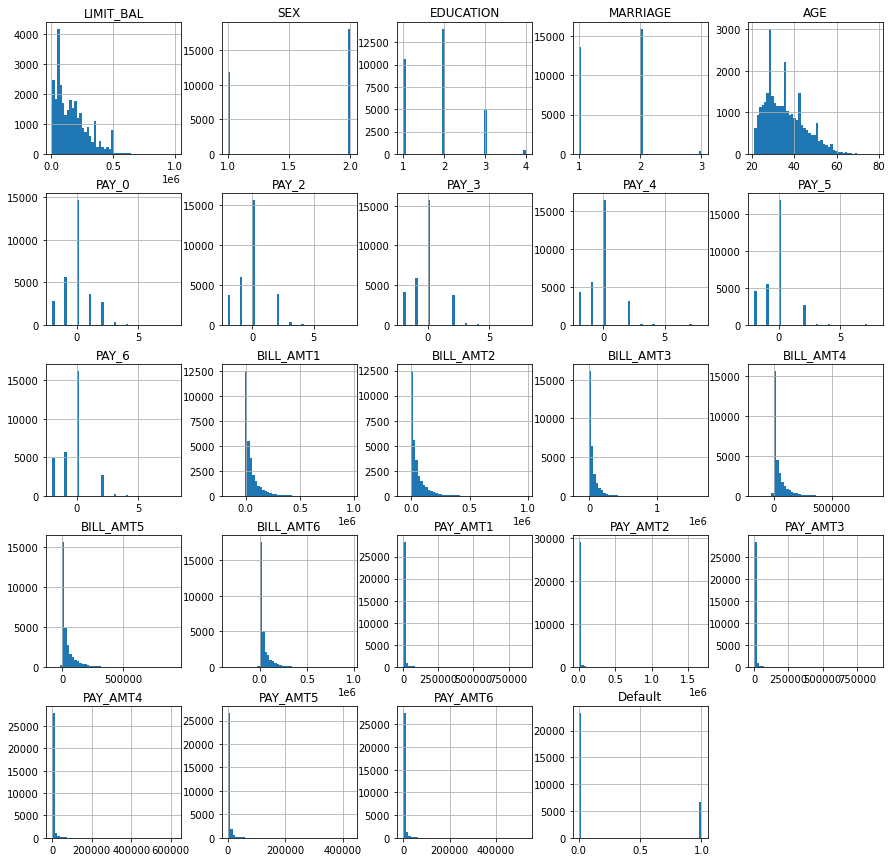

In [15]:
credit_data.hist(figsize=(15,15), bins= 50)

Looking at the distribution plot, some of the bill amount are highly skweed to the right.

### Count plot

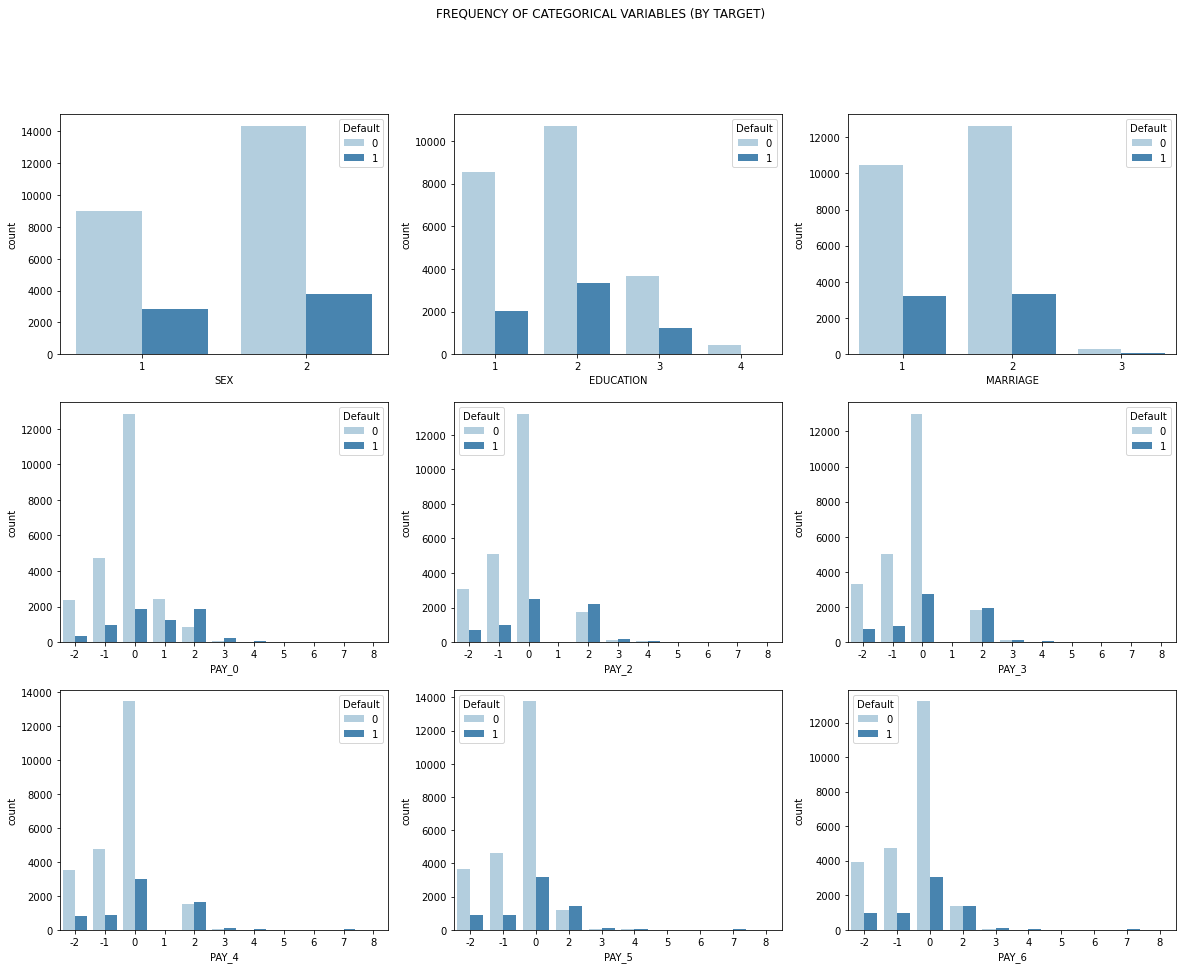

In [16]:
# Creating a new dataframe with categorical variables
subset = credit_data[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'Default']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="Default", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="Default", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="Default", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_0", hue="Default", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="Default", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="Default", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="Default", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="Default", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="Default", data=subset, palette="Blues", ax=axes[2,2]);

The countplot shows that they are more more non defualters per category than defaulters. This further confirms a class imbalance in our dataset. Let's take a closer look at the default column.

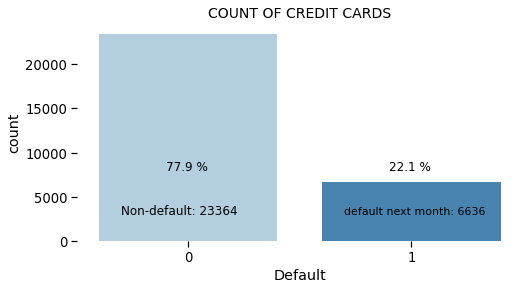

In [17]:
# The frequency of defaults
yes = credit_data['Default'].sum()
no = len(credit_data)-yes

# Percentage
yes_perc = round(yes/len(credit_data)*100, 1)
no_perc = round(no/len(credit_data)*100, 1)

import sys 
plt.figure(figsize=(8,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('Default',data=credit_data, palette="Blues")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('default next month: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=11)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
 #Removing the frame
plt.box(False);

As suspected, we have a class imbalance. As the name implies, a class imbalance is a classification challenge in which the proportion of data from each class is not equal.In our case we have a class imabalance of 78% to 22% 

Let's check the credit limit by age and anlyze any trends.

<AxesSubplot:xlabel='AGE', ylabel='LIMIT_BAL'>

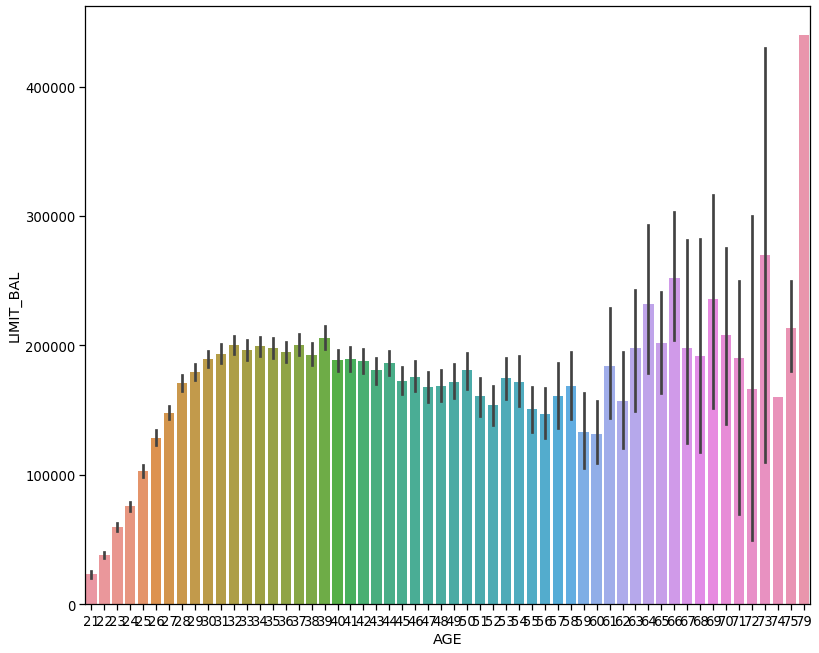

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(13,11)
sns.barplot(credit_data['AGE'], credit_data['LIMIT_BAL'])

There is no clear pattern, however we can easily see an increase in credit limit from 21 to 32. After 32 there is no clear pattern of how the credit limit is distributed with the highest credit limit at age 79.

### Check for correlation

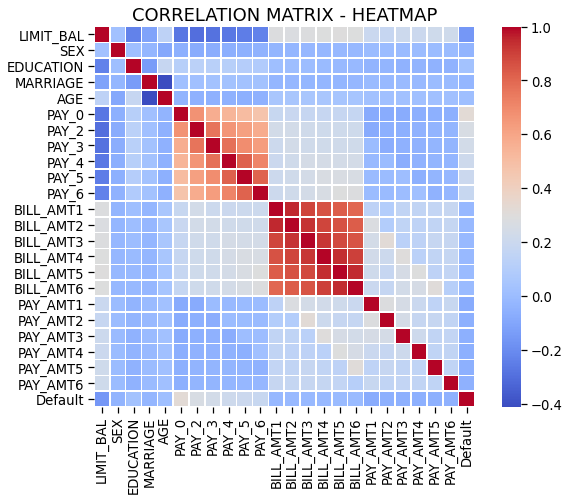

In [19]:
# Looking for correlation 
corr = credit_data.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

The correlation matrix shows a high correlation between the independent variables (BILL_AMT1 to BILL_AMT6).This phenenomen is defined as multicolinearity.Multicollinearity exists when one or more independent variables are highly correlated with each other
Multi-collinearity results in the following:
* Uncertainty in coefficient estimates or unstable variance: Small changes (adding/removing rows/columns) in the data results in change of coefficients.
* Increased standard error: Reduces the accuracy of the estimates and increases the chances of detection.
* Decreased statistical significance: Due to increased standard error, t-statistic declines which negatively impacts the capability of detecting statistical significance in coefficient leading to type-II error.
*  Reducing coefficient & p-value: The importance of the correlated explanatory variable is masked due to collinearity.
* Overfitting: Leads to overfitting as is indicated by the high variance problem.


now let's create a correlation barplot between  Y and X to further investigate the multicolinearity issue.

<AxesSubplot:title={'center':'Correlation with Target Variable'}>

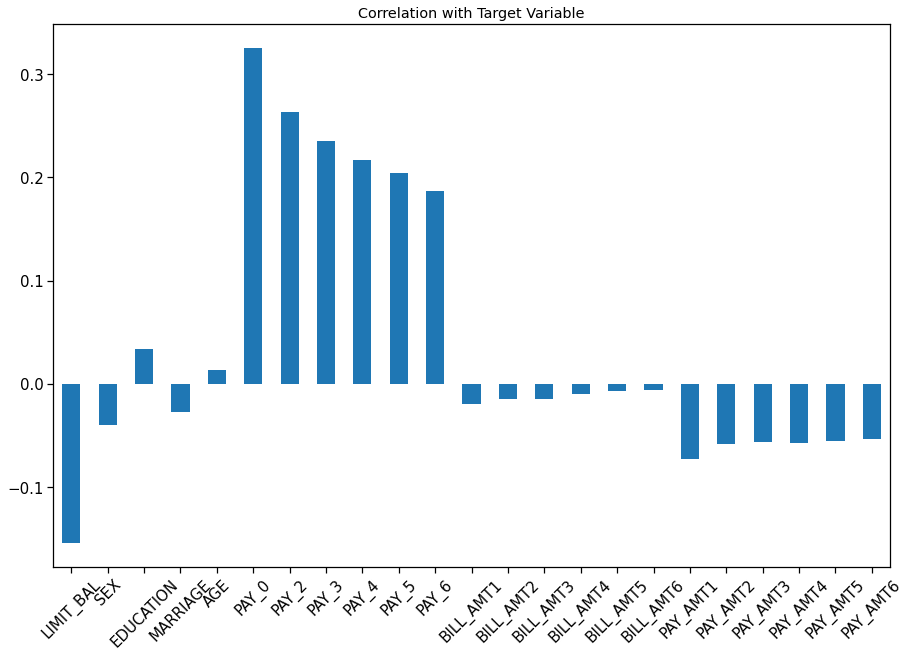

In [20]:
# create a correlation barplot between  Y and X
X = credit_data.drop('Default', axis=1)
y = credit_data['Default']
X.corrwith(y).plot.bar(figsize=(15,10),
                                           title = 'Correlation with Target Variable',
                                           fontsize=15,rot=45,grid=False)

As previously mentioned, the same varaiable have lower impact on the target varaiable. correlations close to zero have fewer impacts which are mainly BILL_AMT 4 and BILL_AMT 5

Let's run a first model with the original data set

## Modeling with the Orignal data set

Let's import the right libraries

In [21]:
## Modeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_validate, train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score, accuracy_score, \
                            precision_recall_curve, f1_score, fbeta_score, roc_auc_score, roc_curve, fbeta_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.pipeline import make_pipeline, Pipeline

In [22]:
# split X and Y
X = credit_data.drop('Default', axis=1)
y = credit_data['Default']

In [23]:
# Train and test split 80:20
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [24]:
print(X_remainder.shape)
print(X_test.shape)

(24000, 23)
(6000, 23)


In [25]:
# # Scale the data
# scaler = MinMaxScaler()
# X_remainder_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

### Decision Tree with Original data

In [26]:
depths = np.arange(1, 20)
train_scores = []
test_scores = []

# scaled_train_scores = []
# scaled_test_scores = []

for depth in depths:

    DT = DecisionTreeClassifier(max_depth=depth, random_state =1)
    DT.fit(X_remainder, y_remainder)
    
    train_scores.append(DT.score(X_remainder, y_remainder))
    test_scores.append(DT.score(X_test, y_test))

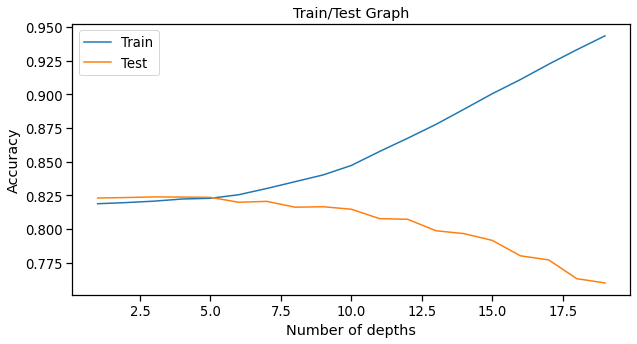

In [27]:
# let's plot the train/test graph
plt.figure(figsize=(10,5))
plt.plot(depths, train_scores, label="Train")
plt.plot(depths, test_scores, label="Test")
plt.xlabel("Number of depths")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Train/Test Graph")
plt.show()

The graph shows that our model does not work well on the test data. let's try to improve the score

## Cross Validation Method

In [28]:
## Train,test,validation split
X_train, X_val, y_train, y_val = train_test_split(X_remainder, y_remainder, test_size = 0.25, random_state = 17)


## Create Functions

In [29]:
def cm_chart_with_threshold(model, X_remainder, y_remainder, threshold):
    # Numbers for the confuion matrix
    plt.figure(figsize=(10, 7))
    plt.title("Confusion Matrix\n")
    feature = X_remainder
    y_proba = model.predict_proba(feature)[:, 1]
    y_pred = (y_proba >= threshold)
    cm = confusion_matrix(y_remainder, y_pred)

    # Set up the labels for in the confusion matrix
    names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n({v3})' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ticklabels = ['Paid', 'Default']
    
    # Create confusion matrix as heatmap
    sns.set(font_scale = 1.2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
    plt.xlabel("Predicted", size=15)
    plt.ylabel("Actual", size=15);
    
    ## Summary Statistics
    TN, FP, FN, TP = cm.ravel() 
    accuracy = (TP + TN) / np.sum(cm) # positive out of all values
    precision = TP / (TP+FP) # positive out of all predicted positives
    recall =  TP / (TP+FN) # positive out of all real positives
    specificity = TN / (TN+FP) # negative out of all real negatives
    f1 = 2*precision*recall / (precision + recall)
    stats_summary = '\n\nAccuracy = {:.2%}\nPrecision = {:.2%}\nRecall = {:.2%}\nSpecificity = {:.2%}\nF1 Score = {:.2%}'.format(accuracy, precision, recall, specificity, f1)
    print(stats_summary)

In [30]:
def curves(model, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(20, 5))
    
    # ROC Curve
    plt.subplot(1, 3, 1)
    model.fit(X, y)
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    plt.plot(fpr, tpr,lw=2)
    plt.plot([0,1],[0,1],c='violet',ls='--')
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve for Credit Card Default');
    print("ROC AUC score = ", roc_auc_score(y_test, y_proba))
    
    # Precision and Recall Curves
    plt.subplot(1, 3, 2)
    precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, y_proba)
    
    plt.plot(threshold_curve, precision_curve[1:],label='precision')
    plt.plot(threshold_curve, recall_curve[1:], label='recall')
    plt.legend(loc='lower left')
    plt.xlabel('Threshold (Probablity)')
    plt.title('Precision and Recall Curves');
    
    # Precision and Recall Curves
    plt.subplot(1, 3, 3)
    plt.plot(recall_curve[1:], precision_curve[1:], label='precision')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve");

In [31]:
def model_score(model, X_remainder, y_remainder):
    skf = StratifiedKFold(5, random_state=42, shuffle=True)
    scores = cross_validate(model, X_remainder, y_remainder, cv=skf, 
                            scoring=['recall', 'precision', 'accuracy', 'f1', 'balanced_accuracy', 'roc_auc'], 
                            return_estimator=True)
    score_types = ['test_recall', 'test_precision', 'test_accuracy', 
                   'test_balanced_accuracy', 'test_f1', 'test_roc_auc']
    score_dict = {}
    for score_type in score_types:
        score_dict['{0}_mean'.format(score_type)] = str(round((np.mean(scores[score_type])*100),2)) + "%"
        score_dict['{0}_std'.format(score_type)] = str(round((np.std(scores[score_type])*100),2)) + "%"
    return score_dict

In [32]:
def pipeline_score(pipeline, X_remainder, y_remainder):
    skf = StratifiedKFold(5, random_state=42, shuffle=True)
    scores = cross_validate(pipeline, X_remainder, y_remainder, cv=skf,
                            scoring=['recall', 'precision', 'accuracy', 'f1', 'balanced_accuracy', 'roc_auc'],
                            return_estimator=True) 
    score_types = ['test_recall', 'test_precision', 'test_accuracy', 
                   'test_balanced_accuracy', 'test_f1', 'test_roc_auc']
    score_dict = {}
    for score_type in score_types:
        score_dict['{0}_mean'.format(score_type)] = str(round((np.mean(scores[score_type])*100),2)) + "%"
        score_dict['{0}_std'.format(score_type)] = str(round((np.std(scores[score_type])*100),2)) + "%"
    return score_dict

## Dealing with class imbalance

## With Random Oversampling

In [33]:
pipeline = make_pipeline(MinMaxScaler(),
                         RandomOverSampler(random_state=42), 
                         LogisticRegression(C=1, solver='liblinear'))
pipeline_score(pipeline, X_remainder, y_remainder)

{'test_recall_mean': '63.72%',
 'test_recall_std': '1.65%',
 'test_precision_mean': '38.64%',
 'test_precision_std': '0.58%',
 'test_accuracy_mean': '69.52%',
 'test_accuracy_std': '0.35%',
 'test_balanced_accuracy_mean': '67.45%',
 'test_balanced_accuracy_std': '0.8%',
 'test_f1_mean': '48.11%',
 'test_f1_std': '0.92%',
 'test_roc_auc_mean': '72.32%',
 'test_roc_auc_std': '0.97%'}

## With SMOTE

In [34]:
pipeline = make_pipeline(MinMaxScaler(),
                         SMOTE(random_state=42),  
                         LogisticRegression(C=1, solver='liblinear'))
pipeline_score(pipeline, X_remainder, y_remainder)

{'test_recall_mean': '64.49%',
 'test_recall_std': '1.72%',
 'test_precision_mean': '37.93%',
 'test_precision_std': '0.6%',
 'test_accuracy_mean': '68.73%',
 'test_accuracy_std': '0.44%',
 'test_balanced_accuracy_mean': '67.21%',
 'test_balanced_accuracy_std': '0.79%',
 'test_f1_mean': '47.76%',
 'test_f1_std': '0.89%',
 'test_roc_auc_mean': '72.39%',
 'test_roc_auc_std': '1.0%'}

## With ADASYN

In [35]:
pipeline = make_pipeline(MinMaxScaler(), 
                         ADASYN(random_state=42), 
                         LogisticRegression(C=1, solver='liblinear'))
pipeline_score(pipeline,X_remainder, y_remainder)

{'test_recall_mean': '68.28%',
 'test_recall_std': '1.68%',
 'test_precision_mean': '34.6%',
 'test_precision_std': '0.53%',
 'test_accuracy_mean': '64.35%',
 'test_accuracy_std': '0.41%',
 'test_balanced_accuracy_mean': '65.75%',
 'test_balanced_accuracy_std': '0.8%',
 'test_f1_mean': '45.92%',
 'test_f1_std': '0.83%',
 'test_roc_auc_mean': '72.45%',
 'test_roc_auc_std': '0.93%'}

We will apply ADSYN because it gives us the best recall score

## Modeling

## I : K-nearest neighbor

In [36]:
pipeline = make_pipeline(MinMaxScaler(),
                         ADASYN(random_state=42),  
                         KNeighborsClassifier(n_neighbors=23))
pipeline_score(pipeline,X_remainder, y_remainder)

{'test_recall_mean': '69.03%',
 'test_recall_std': '1.21%',
 'test_precision_mean': '33.86%',
 'test_precision_std': '0.17%',
 'test_accuracy_mean': '63.22%',
 'test_accuracy_std': '0.45%',
 'test_balanced_accuracy_mean': '65.3%',
 'test_balanced_accuracy_std': '0.19%',
 'test_f1_mean': '45.43%',
 'test_f1_std': '0.19%',
 'test_roc_auc_mean': '71.57%',
 'test_roc_auc_std': '0.57%'}

## II: Logistic Regression

1) Hyperparameter Optimization

In [37]:
lr = Pipeline([('scaling', MinMaxScaler()),
               ('sampling', ADASYN(random_state=42)),
               ('classification', LogisticRegression())])

params = {'classification__penalty': ['l1'],
          'classification__C': 10**np.linspace(-4,-2,10), 
          'classification__solver': ['liblinear']}
clf = GridSearchCV(lr, param_grid=params, cv=5, scoring='recall', verbose=2, n_jobs=-1)
best_model = clf.fit(X_remainder, y_remainder)
best_model.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   25.1s finished


{'classification__C': 0.003593813663804626,
 'classification__penalty': 'l1',
 'classification__solver': 'liblinear'}

2) Scoring

In [38]:
pipeline = make_pipeline(MinMaxScaler(),
                         ADASYN(random_state=42),  
                         LogisticRegression(solver='liblinear', C=0.0035, penalty='l1'))
pipeline_score(pipeline,X_remainder, y_remainder)

{'test_recall_mean': '73.92%',
 'test_recall_std': '1.27%',
 'test_precision_mean': '30.46%',
 'test_precision_std': '0.47%',
 'test_accuracy_mean': '56.79%',
 'test_accuracy_std': '0.72%',
 'test_balanced_accuracy_mean': '62.91%',
 'test_balanced_accuracy_std': '0.68%',
 'test_f1_mean': '43.14%',
 'test_f1_std': '0.62%',
 'test_roc_auc_mean': '70.75%',
 'test_roc_auc_std': '0.78%'}

3) Feature Importance

In [39]:
lr = Pipeline([('scaling', MinMaxScaler()),
               ('sampling', ADASYN(random_state=42)),
               ('classification', LogisticRegression(solver='liblinear', C=1, penalty='l1'))])

coef = lr.fit(X_remainder, y_remainder)[-1].coef_.ravel()
lr_feature_df = pd.DataFrame({'Feature': X.columns, 'coef': coef})
lr_feature_df['color'] = lr_feature_df['coef'].apply(lambda x: 'Green' if x >= 0 else 'Red')
lr_feature_df = lr_feature_df.sort_values(by=['coef'], ascending=False).reset_index(drop = True)
lr_feature_df

,Feature,coef,color
0,PAY_0,4.194750,Green
1,BILL_AMT2,2.093890,Green
2,BILL_AMT3,0.910137,Green
3,BILL_AMT5,0.862306,Green
4,BILL_AMT4,0.658620,Green
5,PAY_2,0.474466,Green
6,PAY_3,0.400313,Green
7,AGE,0.328823,Green
8,BILL_AMT6,0.000000,Green
9,PAY_6,0.000000,Green


([<matplotlib.axis.YTick at 0x1a1fc35f28>,
 [Text(0, 0, 'PAY_0'),
  Text(0, 1, 'BILL_AMT2'),
  Text(0, 2, 'BILL_AMT3'),
  Text(0, 3, 'BILL_AMT5'),
  Text(0, 4, 'BILL_AMT4'),
  Text(0, 5, 'PAY_2'),
  Text(0, 6, 'PAY_3'),
  Text(0, 7, 'AGE'),
  Text(0, 8, 'BILL_AMT6'),
  Text(0, 9, 'PAY_6'),
  Text(0, 10, 'PAY_4'),
  Text(0, 11, 'SEX'),
  Text(0, 12, 'PAY_5'),
  Text(0, 13, 'EDUCATION'),
  Text(0, 14, 'MARRIAGE'),
  Text(0, 15, 'LIMIT_BAL'),
  Text(0, 16, 'PAY_AMT5'),
  Text(0, 17, 'PAY_AMT6'),
  Text(0, 18, 'PAY_AMT3'),
  Text(0, 19, 'BILL_AMT1'),
  Text(0, 20, 'PAY_AMT4'),
  Text(0, 21, 'PAY_AMT2'),
  Text(0, 22, 'PAY_AMT1')])

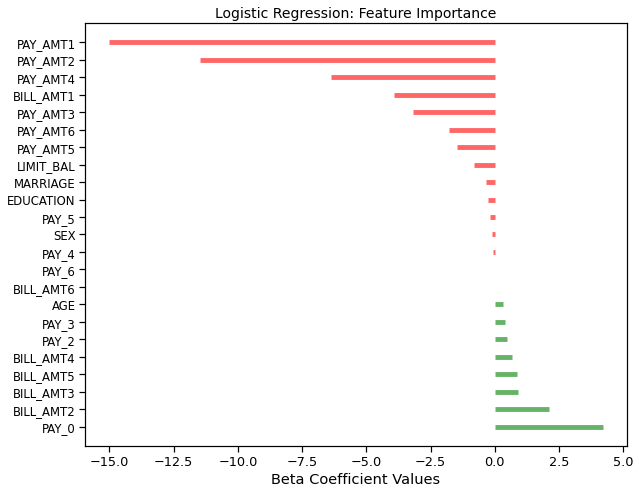

In [40]:
plt.figure(figsize=(10, 8),dpi=70)
plt.title("Logistic Regression: Feature Importance")
plt.hlines(y=lr_feature_df.index, 
           xmin=0, xmax=lr_feature_df['coef'],
           color=lr_feature_df['color'], alpha=0.6, linewidth=5)

plt.xlabel(xlabel = 'Beta Coefficient Values', size = 15)

plt.yticks(lr_feature_df.index, lr_feature_df['Feature'], fontsize=12)


4) Plot ROC Curve

Logistic Regression
ROC AUC score =  0.7226258825959773


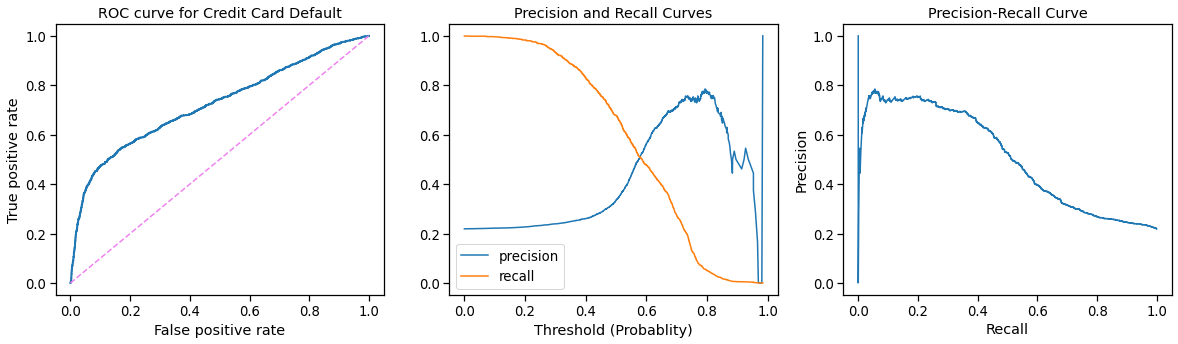

In [41]:
print("Logistic Regression")
curves(lr, X_remainder, y_remainder, X_test, y_test)

## III : Random Forest

1) Hyperparameter Optimaztion

In [42]:
rf = Pipeline([('scaling', MinMaxScaler()),
                ('sampling', ADASYN(random_state=42)),
                ('classification', RandomForestClassifier())])

param_grid = {'classification__max_depth': [7,8], 
              'classification__min_samples_split': [7, 8]}

skf = StratifiedKFold(5, random_state=42, shuffle=True)

clf = GridSearchCV(rf, param_grid = param_grid, 
                   n_jobs = -1, verbose = 2, scoring='recall', cv=skf)
best_model = clf.fit(X_remainder, y_remainder)
best_params = clf.best_params_
best_params

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   39.7s finished


{'classification__max_depth': 7, 'classification__min_samples_split': 8}

2) Scoring

In [43]:
pipeline = make_pipeline(MinMaxScaler(),
                         ADASYN(random_state=42),  
                         RandomForestClassifier(bootstrap=True, max_depth = 7, min_samples_split=7))
pipeline_score(pipeline, X_remainder, y_remainder)

{'test_recall_mean': '58.06%',
 'test_recall_std': '1.12%',
 'test_precision_mean': '48.49%',
 'test_precision_std': '1.44%',
 'test_accuracy_mean': '77.0%',
 'test_accuracy_std': '0.8%',
 'test_balanced_accuracy_mean': '70.23%',
 'test_balanced_accuracy_std': '0.76%',
 'test_f1_mean': '52.83%',
 'test_f1_std': '1.13%',
 'test_roc_auc_mean': '76.73%',
 'test_roc_auc_std': '0.76%'}

3) Feature Importance

In [44]:
rf = Pipeline([('scaling', MinMaxScaler()),
               ('sampling', ADASYN(random_state=42)),
               ('classification', RandomForestClassifier(bootstrap=True, max_depth = 7, min_samples_split=7))])

rf.fit(X_remainder, y_remainder)
rf_feature_df = pd.DataFrame(rf.named_steps['classification'].feature_importances_,
                             index=X.columns,
                             columns=['importance']).sort_values('importance', ascending=False)
rf_feature_df = pd.DataFrame({'Feature': X.columns, 'coef': coef})
rf_feature_df['color'] = rf_feature_df['coef'].apply(lambda x: 'Green' if x >= 0 else 'Red')
rf_feature_df

,Feature,coef,color
0,LIMIT_BAL,-0.827499,Red
1,SEX,-0.123710,Red
2,EDUCATION,-0.248624,Red
3,MARRIAGE,-0.327947,Red
4,AGE,0.328823,Green
5,PAY_0,4.194750,Green
6,PAY_2,0.474466,Green
7,PAY_3,0.400313,Green
8,PAY_4,-0.058219,Red
9,PAY_5,-0.191688,Red


([<matplotlib.axis.YTick at 0x1a219b9b00>,
 [Text(0, 0, 'LIMIT_BAL'),
  Text(0, 1, 'SEX'),
  Text(0, 2, 'EDUCATION'),
  Text(0, 3, 'MARRIAGE'),
  Text(0, 4, 'AGE'),
  Text(0, 5, 'PAY_0'),
  Text(0, 6, 'PAY_2'),
  Text(0, 7, 'PAY_3'),
  Text(0, 8, 'PAY_4'),
  Text(0, 9, 'PAY_5'),
  Text(0, 10, 'PAY_6'),
  Text(0, 11, 'BILL_AMT1'),
  Text(0, 12, 'BILL_AMT2'),
  Text(0, 13, 'BILL_AMT3'),
  Text(0, 14, 'BILL_AMT4'),
  Text(0, 15, 'BILL_AMT5'),
  Text(0, 16, 'BILL_AMT6'),
  Text(0, 17, 'PAY_AMT1'),
  Text(0, 18, 'PAY_AMT2'),
  Text(0, 19, 'PAY_AMT3'),
  Text(0, 20, 'PAY_AMT4'),
  Text(0, 21, 'PAY_AMT5'),
  Text(0, 22, 'PAY_AMT6')])

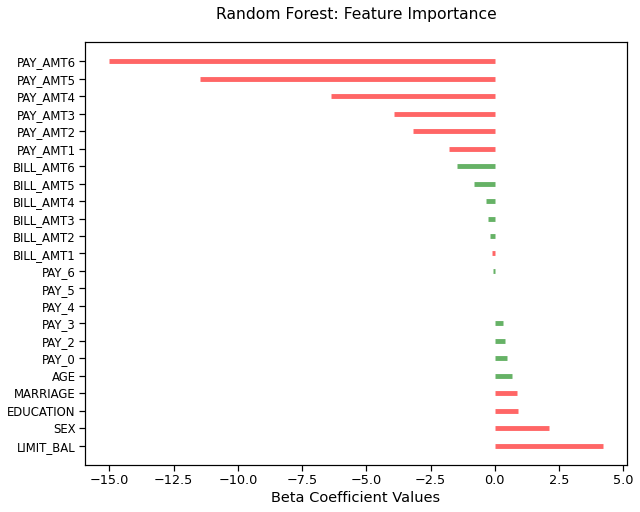

In [45]:
plt.figure(figsize=(10, 8), dpi=70)
plt.title("Random Forest: Feature Importance\n", size=16)
plt.hlines(y=rf_feature_df.index, 
           xmin=0, xmax=lr_feature_df['coef'],
           color=rf_feature_df['color'], alpha=0.6, linewidth=5)

plt.xlabel(xlabel = 'Beta Coefficient Values', size = 15)
plt.yticks(rf_feature_df.index, rf_feature_df['Feature'], fontsize=12)


4) Plot ROC Curve

ROC AUC score =  0.7993067370599688


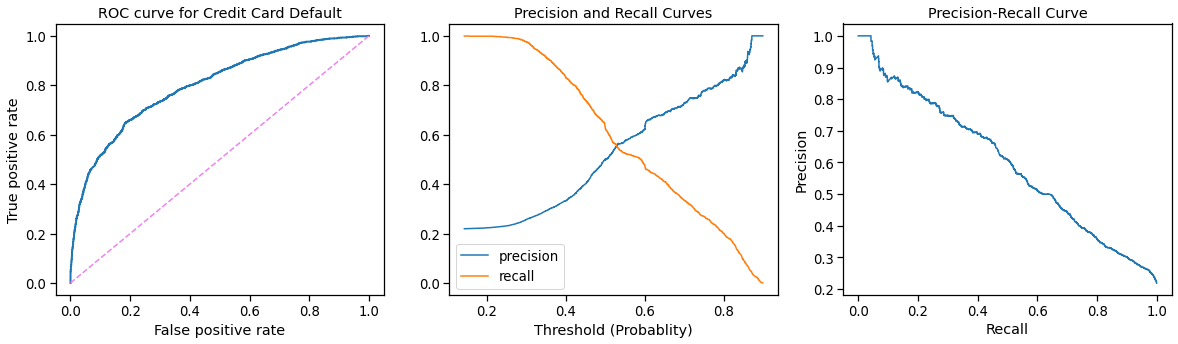

In [46]:
curves(rf, X_remainder, y_remainder, X_test, y_test)

## 4 : Extra Trees

1) Hyperparameter Optimization

In [47]:
et = Pipeline([('scaling', MinMaxScaler()),
               ('sampling', ADASYN(random_state=42)),
               ('classification', ExtraTreesClassifier(bootstrap=True))])

param_grid = {'classification__max_depth': [5, 6, 7],
              'classification__min_samples_split': [6, 7, 8],
              'classification__n_estimators': [50,100, 200, 500]}

clf = GridSearchCV(et, param_grid = param_grid, cv=5, n_jobs = -1, verbose = 2, scoring='recall')
best_model = clf.fit(X_remainder, y_remainder)
best_params = clf.best_params_
best_params

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.8min finished


{'classification__max_depth': 7,
 'classification__min_samples_split': 6,
 'classification__n_estimators': 100}

2) Scoring

In [48]:
pipeline = make_pipeline(MinMaxScaler(),
                         ADASYN(random_state=42),  
                         ExtraTreesClassifier(max_depth = 7, min_samples_split=6, bootstrap=True, n_estimators=100))
pipeline_score(pipeline, X_remainder, y_remainder)


{'test_recall_mean': '58.1%',
 'test_recall_std': '1.41%',
 'test_precision_mean': '49.2%',
 'test_precision_std': '1.6%',
 'test_accuracy_mean': '77.38%',
 'test_accuracy_std': '0.85%',
 'test_balanced_accuracy_mean': '70.49%',
 'test_balanced_accuracy_std': '0.85%',
 'test_f1_mean': '53.26%',
 'test_f1_std': '1.27%',
 'test_roc_auc_mean': '76.3%',
 'test_roc_auc_std': '0.92%'}

3) Feature Importance

In [49]:
et = Pipeline([('scaling', MinMaxScaler()),
               ('sampling', ADASYN(random_state=42)),
               ('classification', ExtraTreesClassifier(bootstrap=True, 
                                                       max_depth = 5, 
                                                       min_samples_split=6))])

et.fit(X_remainder, y_remainder)

et_feature_df = pd.DataFrame(et.steps[2][1].feature_importances_, 
                             index=X.columns,
                             columns=['importance']).sort_values('importance', ascending=False)
et_feature_df

,importance
PAY_2,0.195080
PAY_0,0.185673
PAY_5,0.113975
LIMIT_BAL,0.106981
PAY_6,0.093677
PAY_3,0.067434
PAY_4,0.065644
EDUCATION,0.026743
PAY_AMT2,0.022748
SEX,0.018362


<BarContainer object of 23 artists>

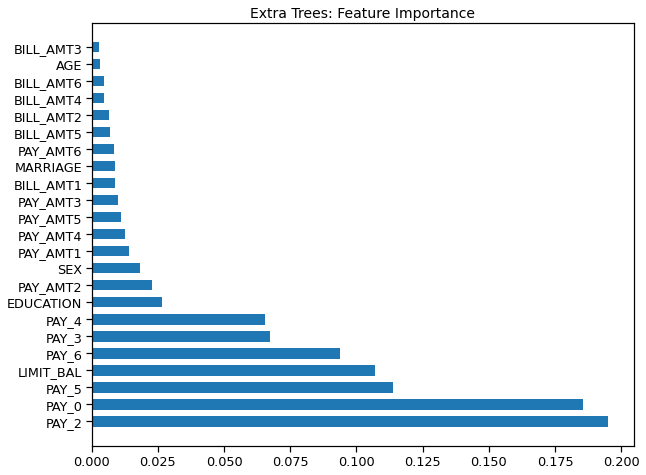

In [50]:
plt.figure(figsize=(10, 8), dpi=70)
plt.title("Extra Trees: Feature Importance")
plt.barh(et_feature_df.index, et_feature_df.importance, height=0.6)


4) Plot the ROC Curve, Precision & Recall Curves, and Precision-Recall Curve

ROC AUC score =  0.7601224477068582


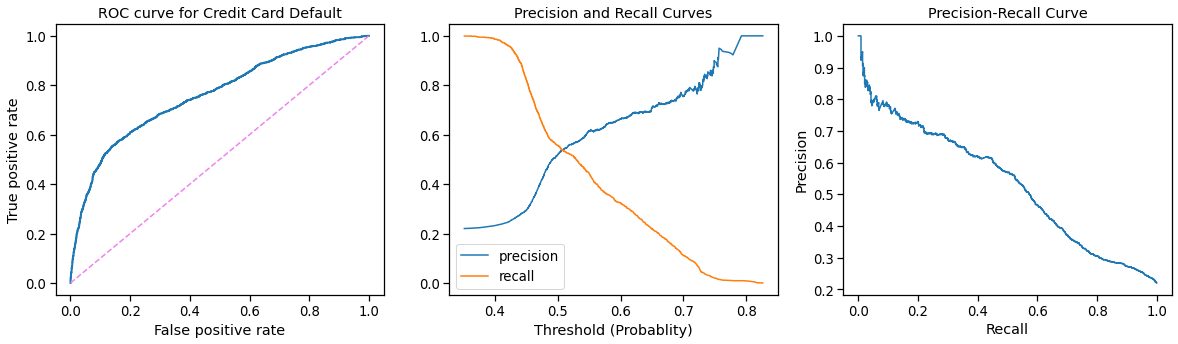

In [51]:
curves(et, X, y, X_test, y_test)

## Ploting three best models

Text(0.5, 1.0, 'ROC-AUC Curves\n(Zoomed-in at Top Right)')

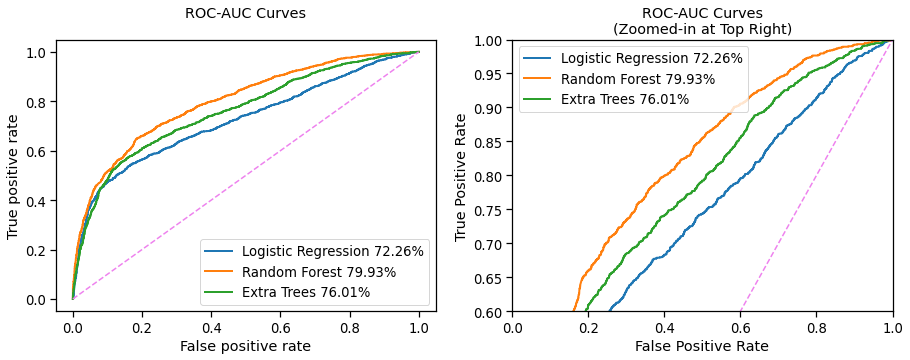

In [52]:
plt.figure(figsize=(15, 5))

## plot #1
plt.subplot(1, 2, 1)

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
score = str(round(roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])*100, 2)) + "%"
plt.plot(fpr, tpr,lw=2, label='Logistic Regression %s' % score)

fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
score = str(round(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])*100, 2)) + "%"
plt.plot(fpr, tpr,lw=2, label='Random Forest %s' % score)

fpr, tpr, thresholds = roc_curve(y_test, et.predict_proba(X_test)[:,1])
score = str(round(roc_auc_score(y_test, et.predict_proba(X_test)[:,1])*100, 2)) + "%"
plt.plot(fpr, tpr,lw=2, label='Extra Trees %s' % score)

plt.legend()
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC-AUC Curves\n');

## plot #2
plt.subplot(1, 2, 2)

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
score = str(round(roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])*100, 2)) + "%"
plt.plot(fpr, tpr,lw=2, label='Logistic Regression %s' % score)

fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
score = str(round(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])*100, 2)) + "%"
plt.plot(fpr, tpr,lw=2, label='Random Forest %s' % score)

fpr, tpr, thresholds = roc_curve(y_test, et.predict_proba(X_test)[:,1])
score = str(round(roc_auc_score(y_test, et.predict_proba(X_test)[:,1])*100, 2)) + "%"
plt.plot(fpr, tpr, lw=2, label='Extra Trees %s' % score)

plt.legend()
plt.xlim(0, 1)
plt.ylim(0.6, 1)
plt.plot([0,1],[0,1], c='violet', ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves\n(Zoomed-in at Top Right)')

## Finding the Optimal Threshold

In [53]:
rf.fit(X, y)
y_proba = rf.named_steps['classification'].predict_proba(X_test)[:, 1]
threshold_dict = {}
thresholds = [round(index, 4) for index in np.linspace(0,1,10000)]
for threshold in thresholds:
    #anything above or equal to the threshold is 1
    #anything below the threshold is 0
    y_pred = (y_proba >= threshold)
    f2_score = fbeta_score(y_test, y_pred, 2)
    threshold_dict[threshold] = f2_score

optimal_threshold = max(threshold_dict, key=threshold_dict.get)
print("Optimal Threshold:", optimal_threshold)

y_pred = (y_proba >= optimal_threshold)
f2_score = fbeta_score(y_test, y_pred, 2)
print("F2 Score:", f2_score)

Optimal Threshold: 0.239
F2 Score: 0.6084161309175921


## Final Model



Accuracy = 32.73%
Precision = 24.19%
Recall = 97.11%
Specificity = 14.68%
F1 Score = 38.74%


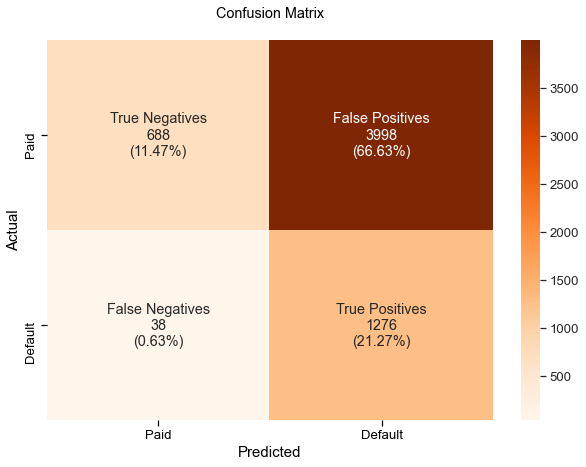

In [54]:
final_model = make_pipeline(MinMaxScaler(),
                            ADASYN(random_state=42),  
                            RandomForestClassifier(bootstrap=True, max_depth = 7, 
                                                   min_samples_split=7, n_jobs = -1))
 
final_model.fit(X_remainder, y_remainder)
cm_chart_with_threshold(final_model, X_test, y_test, 0.284)



Accuracy = 59.77%
Precision = 33.00%
Recall = 81.28%
Specificity = 53.73%
F1 Score = 46.95%


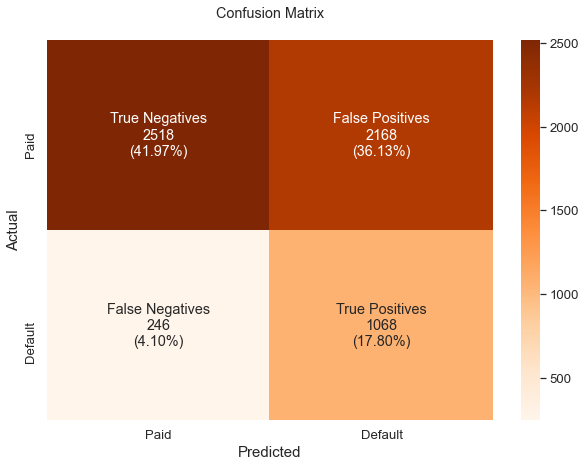

In [55]:
cm_chart_with_threshold(final_model, X_test, y_test, 0.400)

## Making Individual Prediction

In [56]:
def make_ind_prediction(new_data):
    data = new_data.values.reshape(1, -1)
    prob = final_model.predict_proba(data)[0][1]
    if prob >= 0.2:
        return 'Will default'
    else:
        return 'Will pay'

In [57]:
from collections import OrderedDict
new_customer = OrderedDict([('limit_bal', 4000),('age', 50 ),('bill_amt1', 500),
                            ('bill_amt2', 35509 ),('bill_amt3', 689 ),('bill_amt4', 0 ),
                            ('bill_amt5', 0 ),('bill_amt6', 0 ), ('pay_amt1', 0 ),('pay_amt2', 35509 ),
                            ('pay_amt3', 0 ),('pay_amt4', 0 ),('pay_amt5', 0 ), ('pay_amt6', 0 ),
                            ('sex', 1 ),('education', 1 ),('married', 1 ),('pay_0', -1 ),('pay_2', -1 ),('pay_3', -1 ),
                            ('pay_4', 0),('pay_5', -1), ('pay_6', 0)])

new_customer = pd.Series(new_customer)
make_ind_prediction(new_customer)

'Will default'